In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# im_path = r'C:\TUC_study\(Thesis)_WS-2022-23\python_work\backup_dmap_viz\lena1.png'
# orig_img = cv2.imread(im_path)
# orig_img = cv2.resize(cv2.imread(im_path), (50, 60))
# gray_im = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)



gray_im = np.random.randint(0, 51, (4, 100))
# block_positions = [np.random.randint(0, 96, 2) for _ in range(4)]
# for pos in block_positions:
#     gray_im[pos[0]:pos[0]+9, pos[1]:pos[1]+9] = 200

plt.imshow(gray_im)
plt.imsave('input_im.png', gray_im)
plt.title('my picture')
plt.show()


In [35]:
import pytest
import argparse

import cv2
import math
import numpy as np


print(pytest.__version__)


7.4.0


In [8]:
import numpy as np

_patch_size = 5

total = []
topk_patches = []

total_patches = []
for row in range(gray_im.shape[0] - _patch_size + 1):
    for col in range(gray_im.shape[1] - _patch_size + 1):
        curr_patch = gray_im[row : row + _patch_size, col: col + _patch_size]
        patch_brightness = np.mean(curr_patch)
        total_patches.append((patch_brightness, row, col))

total_patches = sorted(total_patches, key=lambda l: l[0], reverse=True)


In [9]:
def check_overlap(test_patch, patch_list):
    if len(patch_list) == 0:
        return False
    for _patch in patch_list:
        if (abs(test_patch[1] - _patch[1]) < _patch_size) and \
                (abs(test_patch[2] - _patch[2]) < _patch_size):
            return True
    return False


topk = []
for patch in total_patches:
    if len(topk) < 4:
        if not check_overlap(patch, topk):
            topk.append(patch)
    else:
        break     


center_points = [[i + _patch_size//2, j + _patch_size//2] for _,i,j in topk]
topk, center_points

([(200.0, 33, 11), (200.0, 56, 17), (200.0, 67, 58), (200.0, 91, 36)],
 [[35, 13], [58, 19], [69, 60], [93, 38]])

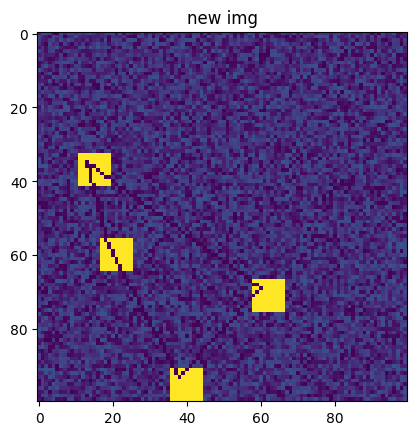

In [10]:
import cv2
import math
import numpy as np

# arr = np.random.randint(0, 256, size=(100, 100), dtype=np.uint8)
# img =  cv2.cvtColor(arr, cv2.COLOR_RGB2BGR)

# points = [[10, 20],
#           [85, 79],
#           [90, 22],
#           [14, 99]]

center_points = [[i + _patch_size//2, j + _patch_size//2] for _,i,j in topk]


def distance(p1:tuple[int, int],
             p2:tuple[int, int]) -> float:
    """
    Calculate the Euclidean distance between two points.
    """
    return ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** 0.5

def calc_polar_angle(p1: tuple[int, int],
                     p2: tuple[int, int]) -> float:
    """
    Calculate the polar angle between two points.

    Args:
        p1 (Tuple[int, int]): The coordinates of the first point (x1, y1).
        p2 (Tuple[int, int]): The coordinates of the second point (x2, y2).

    Returns:
        float: The polar angle between the two points in radians.
    """
    return math.atan2(p2[1] - p1[1], p2[0] - p1[0])

def order_coordinates_anticlock(points: list[tuple])-> list[tuple]:
    """
    Order a list of coordinates in an anticlockwise sequence.

    Args:
        points (List[Tuple[int, int]]): A list of tuples representing (x, y) coordinates.

    Returns:
        List[Tuple[int, int]]: A list of coordinates sorted in an anticlockwise order.
    """
    centroid = [sum(x for x, y in points) / 4, sum(y for x, y in points) / 4]
    points.sort(key=lambda p: (calc_polar_angle(centroid, p), - distance(centroid, p)))
    return points

# Draw red quadrilateral box
def draw_quadrilateral(img, points: list[tuple]):
    
    all_X = [i for i,_ in points]
    all_Y = [j for _,j in points]
    if len(points) != 4 or \
        any(all_X.count(x) >= 3 for x in set(all_X)) or \
        any(all_Y.count(x) >= 3 for x in set(all_Y)):
        print("Could not find a Quadrilateral!")
    
    ordered_pts = order_coordinates_anticlock(points)
    box = [[y,x] for [x,y] in ordered_pts]
    box = np.array(box).reshape((-1, 1, 2))
    color = (0, 0, 255) # BGR
    cv2.polylines(img, [box], isClosed=True, color=color, thickness=1) 
    # cv2.imwrite("output_image.png", img)
    plt.imshow(img)
    plt.title('new img')
    plt.show()


draw_quadrilateral(gray_im, center_points)